In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('./data.csv',encoding='unicode_escape')
df.head(5).T

,0,1,2,3,4
InvoiceNo,536365,536365,536365,536365,536365
StockCode,85123A,71053,84406B,84029G,84029E
Description,WHITE HANGING HEART T-LIGHT HOLDER,WHITE METAL LANTERN,CREAM CUPID HEARTS COAT HANGER,KNITTED UNION FLAG HOT WATER BOTTLE,RED WOOLLY HOTTIE WHITE HEART.
Quantity,6,6,8,6,6
InvoiceDate,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26,12/1/2010 8:26
UnitPrice,2.55,3.39,2.75,3.39,3.39
CustomerID,17850.0,17850.0,17850.0,17850.0,17850.0
Country,United Kingdom,United Kingdom,United Kingdom,United Kingdom,United Kingdom


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.duplicated().sum()

5268

In [7]:
df = df.drop_duplicates()
df= df.dropna()

In [8]:
df_int = df[['Quantity','UnitPrice','CustomerID']]

In [9]:
# df.nunique()

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    401604 non-null  object 
 1   StockCode    401604 non-null  object 
 2   Description  401604 non-null  object 
 3   Quantity     401604 non-null  int64  
 4   InvoiceDate  401604 non-null  object 
 5   UnitPrice    401604 non-null  float64
 6   CustomerID   401604 non-null  float64
 7   Country      401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,401604.0,12.183273,250.283037,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,401604.0,3.474064,69.764035,0.0,1.25,1.95,3.75,38970.0
CustomerID,401604.0,15281.160818,1714.006089,12346.0,13939.00,15145.00,16784.00,18287.0


In [12]:
df_clean_l = df.drop(df[(df['Quantity'] < 0)].index)
df_clean_u = df_clean_l.drop(df_clean_l[(df_clean_l['Quantity'] > 12)].index)

In [13]:
df_clean = df_clean_u.drop(df_clean_u[(df_clean_u['UnitPrice'] < 1)].index)

In [14]:
df_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,269413.0,4.918712,3.895023,1.0,2.00,4.00,8.00,12.00
UnitPrice,269413.0,4.076447,26.757640,1.0,1.65,2.55,4.58,8142.75
CustomerID,269413.0,15320.854031,1707.032265,12347.0,14005.00,15214.00,16818.00,18287.00


In [15]:

random_indices = np.random.randint(0, len(df_clean), size=26900)
df_int = df_clean[['Quantity','UnitPrice','CustomerID']].iloc[random_indices]

In [16]:
df_int.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26900 entries, 324508 to 79216
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Quantity    26900 non-null  int64  
 1   UnitPrice   26900 non-null  float64
 2   CustomerID  26900 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 840.6 KB


In [17]:
df_int.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,26900.0,4.928625,3.890911,1.0,2.00,4.00,8.00,12.00
UnitPrice,26900.0,3.970820,12.835850,1.0,1.65,2.55,4.65,1526.76
CustomerID,26900.0,15313.220855,1702.888455,12347.0,14016.00,15182.00,16813.00,18287.00


In [18]:
df_int.corr()

,Quantity,UnitPrice,CustomerID
Quantity,1.000000,-0.100953,-0.151822
UnitPrice,-0.100953,1.000000,-0.027510
CustomerID,-0.151822,-0.027510,1.000000


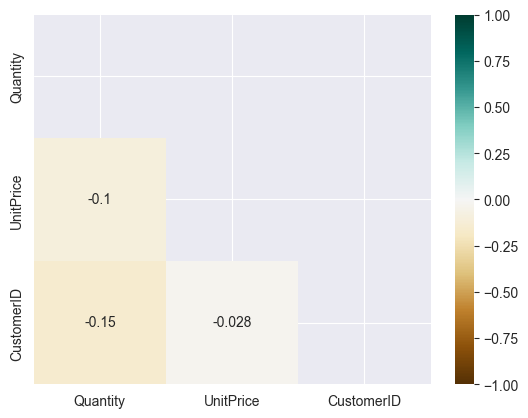

In [19]:
mask = np.triu(np.ones_like(df_int.corr(), dtype=bool))
heatmap = sns.heatmap(df_int.corr(), vmin=-1, vmax=1, mask=mask,annot=True,cmap='BrBG')

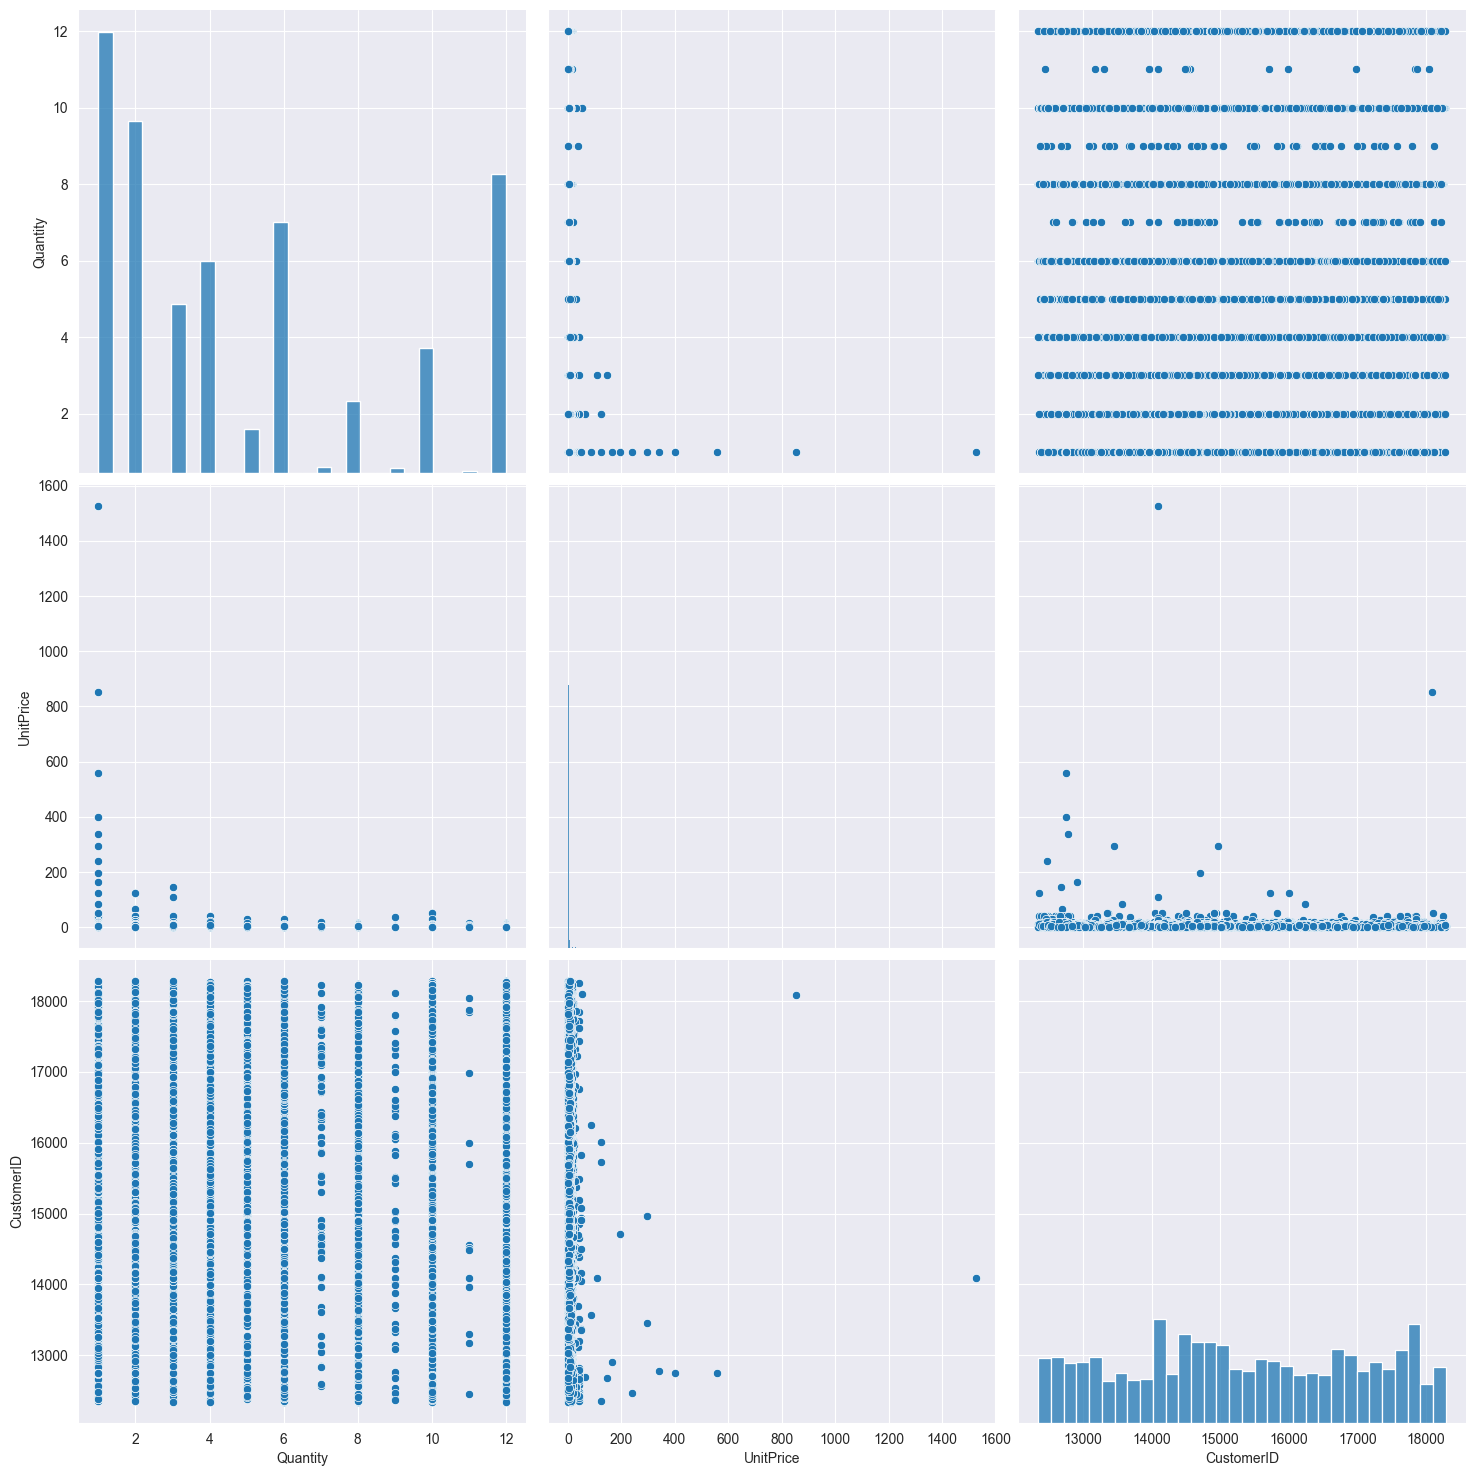

In [20]:
sns.pairplot(df_int,diag_kind='auto',height=5,aspect=1)

In [21]:
df_log = np.log(df_int)
df_log.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,26900.0,1.239735,0.882063,0.000000,0.693147,1.386294,2.079442,2.484907
UnitPrice,26900.0,1.059020,0.685407,0.000000,0.500775,0.936093,1.536867,7.330903
CustomerID,26900.0,9.630224,0.112119,9.421168,9.547955,9.627866,9.729908,9.813946


In [22]:
df_log.isnull().sum()

Quantity      0
UnitPrice     0
CustomerID    0
dtype: int64

In [23]:
df_log = df_log.drop_duplicates()
df_log.duplicated().sum()

0

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_log)

StandardScaler()

In [25]:
df_normalized = scaler.transform(df_log)

In [26]:
from sklearn.cluster import KMeans

# Using the elbow method to find the optimal number of clusters 
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(df_log)
    SSE.append(kmeans.inertia_) 

Text(0, 0.5, 'Inertia')

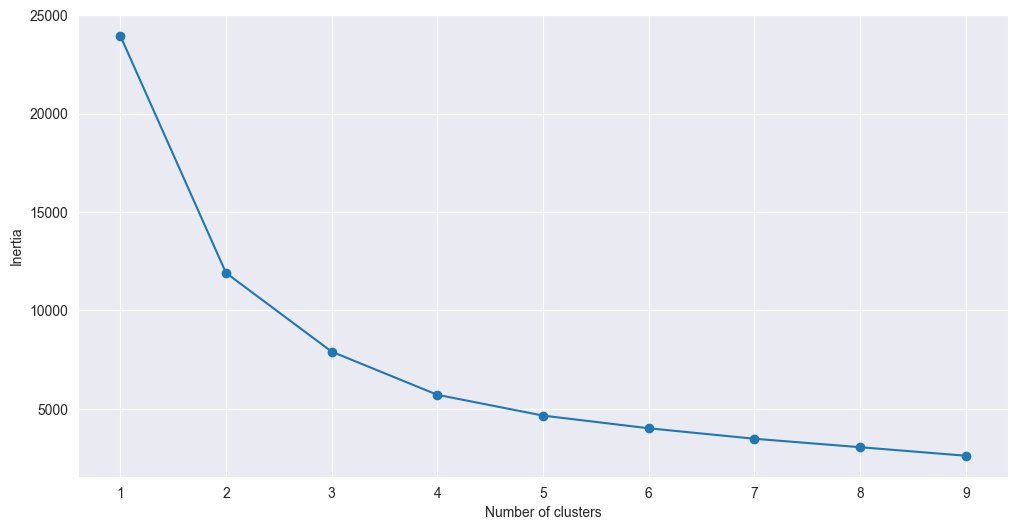

In [27]:
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [28]:
kmeans = KMeans( n_clusters = 4, init='k-means++')
kmeans.fit(df_log)

KMeans(n_clusters=4)

In [29]:
from sklearn.metrics import silhouette_score

print(silhouette_score(df_log, kmeans.labels_, metric='euclidean'))

0.41872801247920566


In [32]:
pred = kmeans.predict(df_log)
df_cluster = pd.DataFrame(df_normalized)

In [33]:
df_cluster['cluster'] = pred

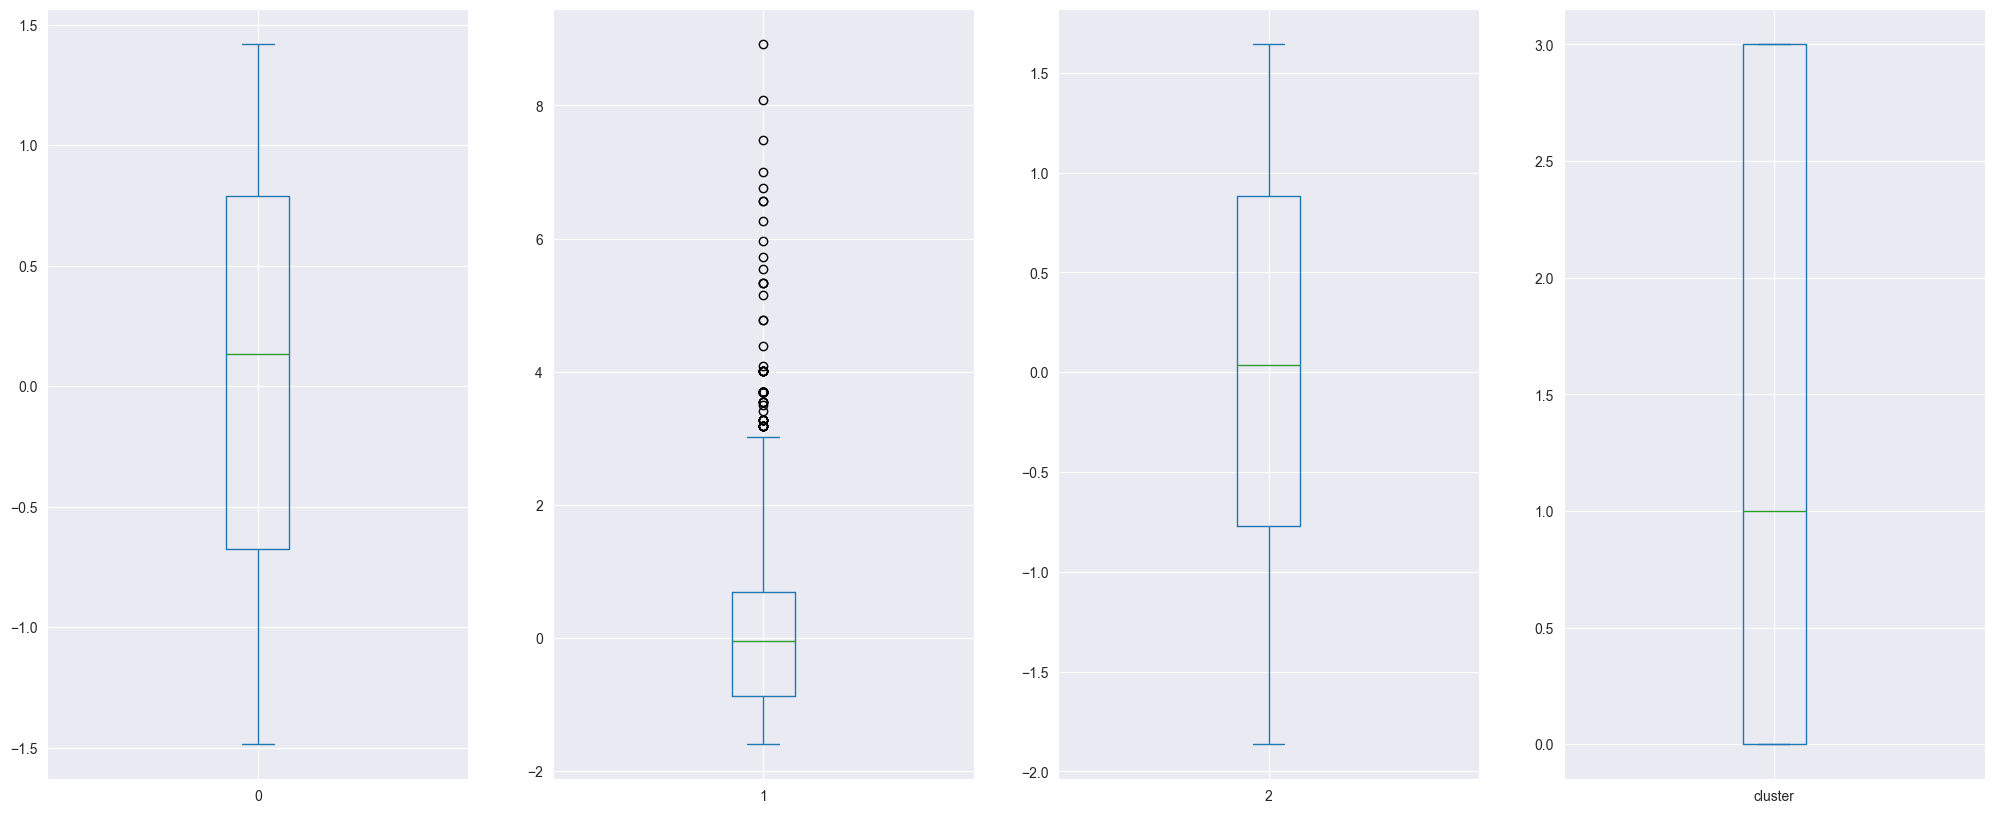

In [35]:
# avg_df = frame.groupby(['cluster'], as_index=False).mean()
df_cluster.plot(kind='box',subplots=True,figsize=(25,10))
plt.show()

In [40]:
df_cluster.columns

Index([0, 1, 2, 'cluster'], dtype='object')

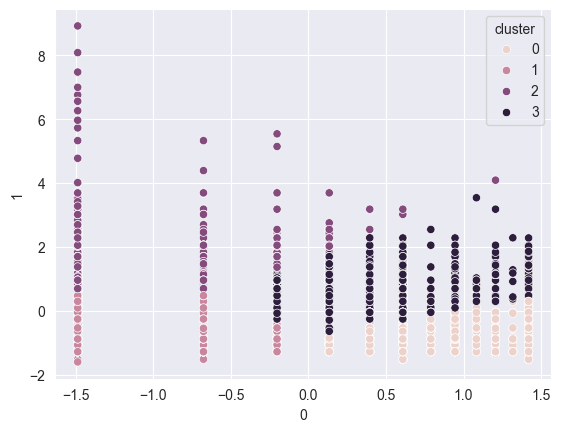

In [60]:

sns.scatterplot(data=df_cluster,x=0,y=1,hue='cluster')
plt.show()

In [28]:

# from scipy.spatial.distance import cdist
# 
# distortions = []
# inertias = []
# mapping1 = {}
# mapping2 = {}
# K = range(1, 10)
# 
# for k in K:
#     # Building and fitting the model
#     kmeanModel = KMeans(n_clusters=k).fit(df_normalized)
#     kmeanModel.fit(df_normalized)
# 
#     distortions.append(sum(np.min(cdist(df_normalized, kmeanModel.cluster_centers_,
#                                         'euclidean'), axis=1)) / df_normalized.shape[0])
#     inertias.append(kmeanModel.inertia_)
# 
#     mapping1[k] = sum(np.min(cdist(df_normalized, kmeanModel.cluster_centers_,
#                                    'euclidean'), axis=1)) / df_normalized.shape[0]
#     mapping2[k] = kmeanModel.inertia_


In [29]:
# plt.plot(K, distortions, 'bx-')
# plt.xlabel('Values of K')
# plt.ylabel('Distortion')
# plt.title('The Elbow Method using Distortion')
# plt.show()
